# Distributions - Physical


## Data

The map used in these charts was taken and modified from the USGS [Water-Resources Investigation Report 03-4126](https://pubs.usgs.gov/wri/wri034126/htdocs/wrir03-4126.html). The map was downloaded as a PDF, cropped and cleaned up, and then exported as TIFF and PNG formats for analysis.

The map represents the surface geology of guam consolidated and updated over several surveys. The map was saved in a high-resolution raster format for pixel-level analysis

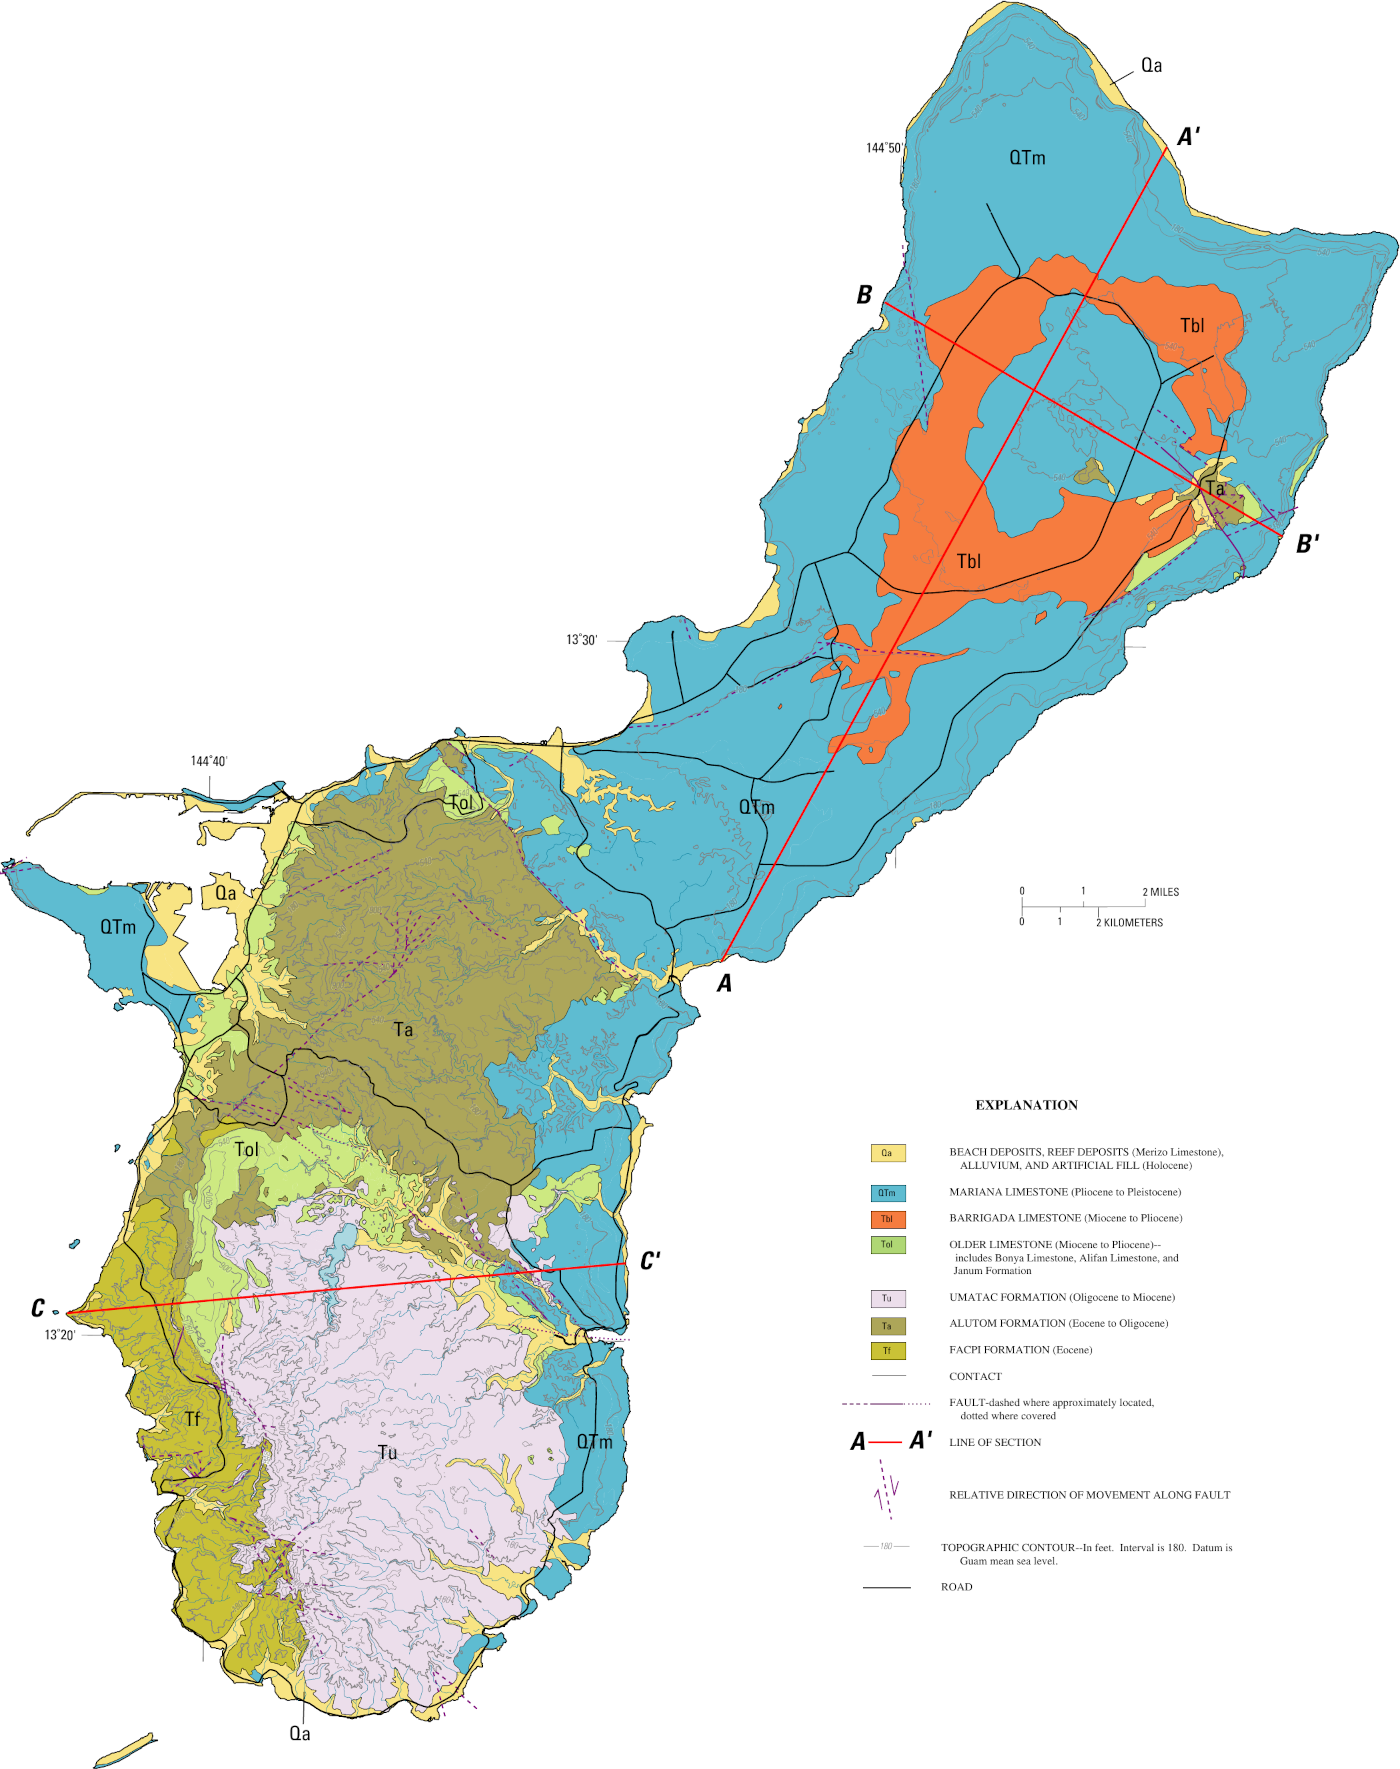

In [189]:
from PIL import Image

filename = 'geological_map.png'
im = Image.open(filename)
display(im)

In [190]:
# Pulling legend data for later use
categories = {
    "QTm": {
        "color": "#5ebcd1",
        "description": "MARIANA LIMESTONE",
        "start": 5.333e6,
        "end": 11700,
    },
    "Qa": {
        "color": "#f8e483",
        "description": "BEACH DEPOSITS, REEF DEPOSITS, ALLUVIUM, AND ARTIFICIAL FILL",
        "start": 11700,
        "end": 0,
    },
    "Ta": {
        "color": "#ada659",
        "description": "ALUTOM FORMATION",
        "start": 56e6,
        "end": 23.03e6,
    },
    "Tbl": {
        "color": "#f67c3f",
        "description": "BARRIGADA LIMESTONE",
        "start": 23.03e6,
        "end": 2.58e6,
    },
    "Tf": {
        "color": "#cac236",
        "description": "FACPI FORMATION",
        "start": 56e6,
        "end": 33.9e6,
    },
    "Tol": {
        "color": "#cde981",
        "description": "OLDER LIMESTONE",
        "start": 23.03e6,
        "end": 2.58e6,
    },
    "Tu": {
        "color": "#ecdeeb",
        "description": "UMATAC FORMATION",
        "start": 33.9e6,
        "end": 5.333e6,
    },
}

In [191]:
# Loading a version of the map without the legend
# for accurate pixel counts and distribution

filename = 'geological_map_no_legend.tif'
im = Image.open(filename).convert('RGB')

width, height = im.size
mode = im.mode

# Show information about the original image.
print(f"Size: {width} x {height} pixels")
print(f"Mode: {mode}")

Size: 1400 x 1769 pixels
Mode: RGB


## Histogram of Colors

Calculating various statistics on the amount and location of the different colors within the map.



In [192]:
from PIL import ImageColor
from io import StringIO
from csv import writer 
import pandas as pd

pix_map = im.load()

# Using StringIO and csv writer for in-memory CSV storage
# quick appends compared to directly dealing with a growing dataframe
data = StringIO()
csv_writer = writer(data)
csv_writer.writerow(["Category", "X", "Y"])

for k, v in categories.items():
    color = ImageColor.getrgb(v["color"])
    for x in range(width):
        for y in range(height):
            pixel = pix_map[x, y]
            if color == pixel:
                csv_writer.writerow([k, x, y])

data.seek(0)
df = pd.read_csv(data)
print(df.shape)

(598351, 3)


In [193]:
%matplotlib inline

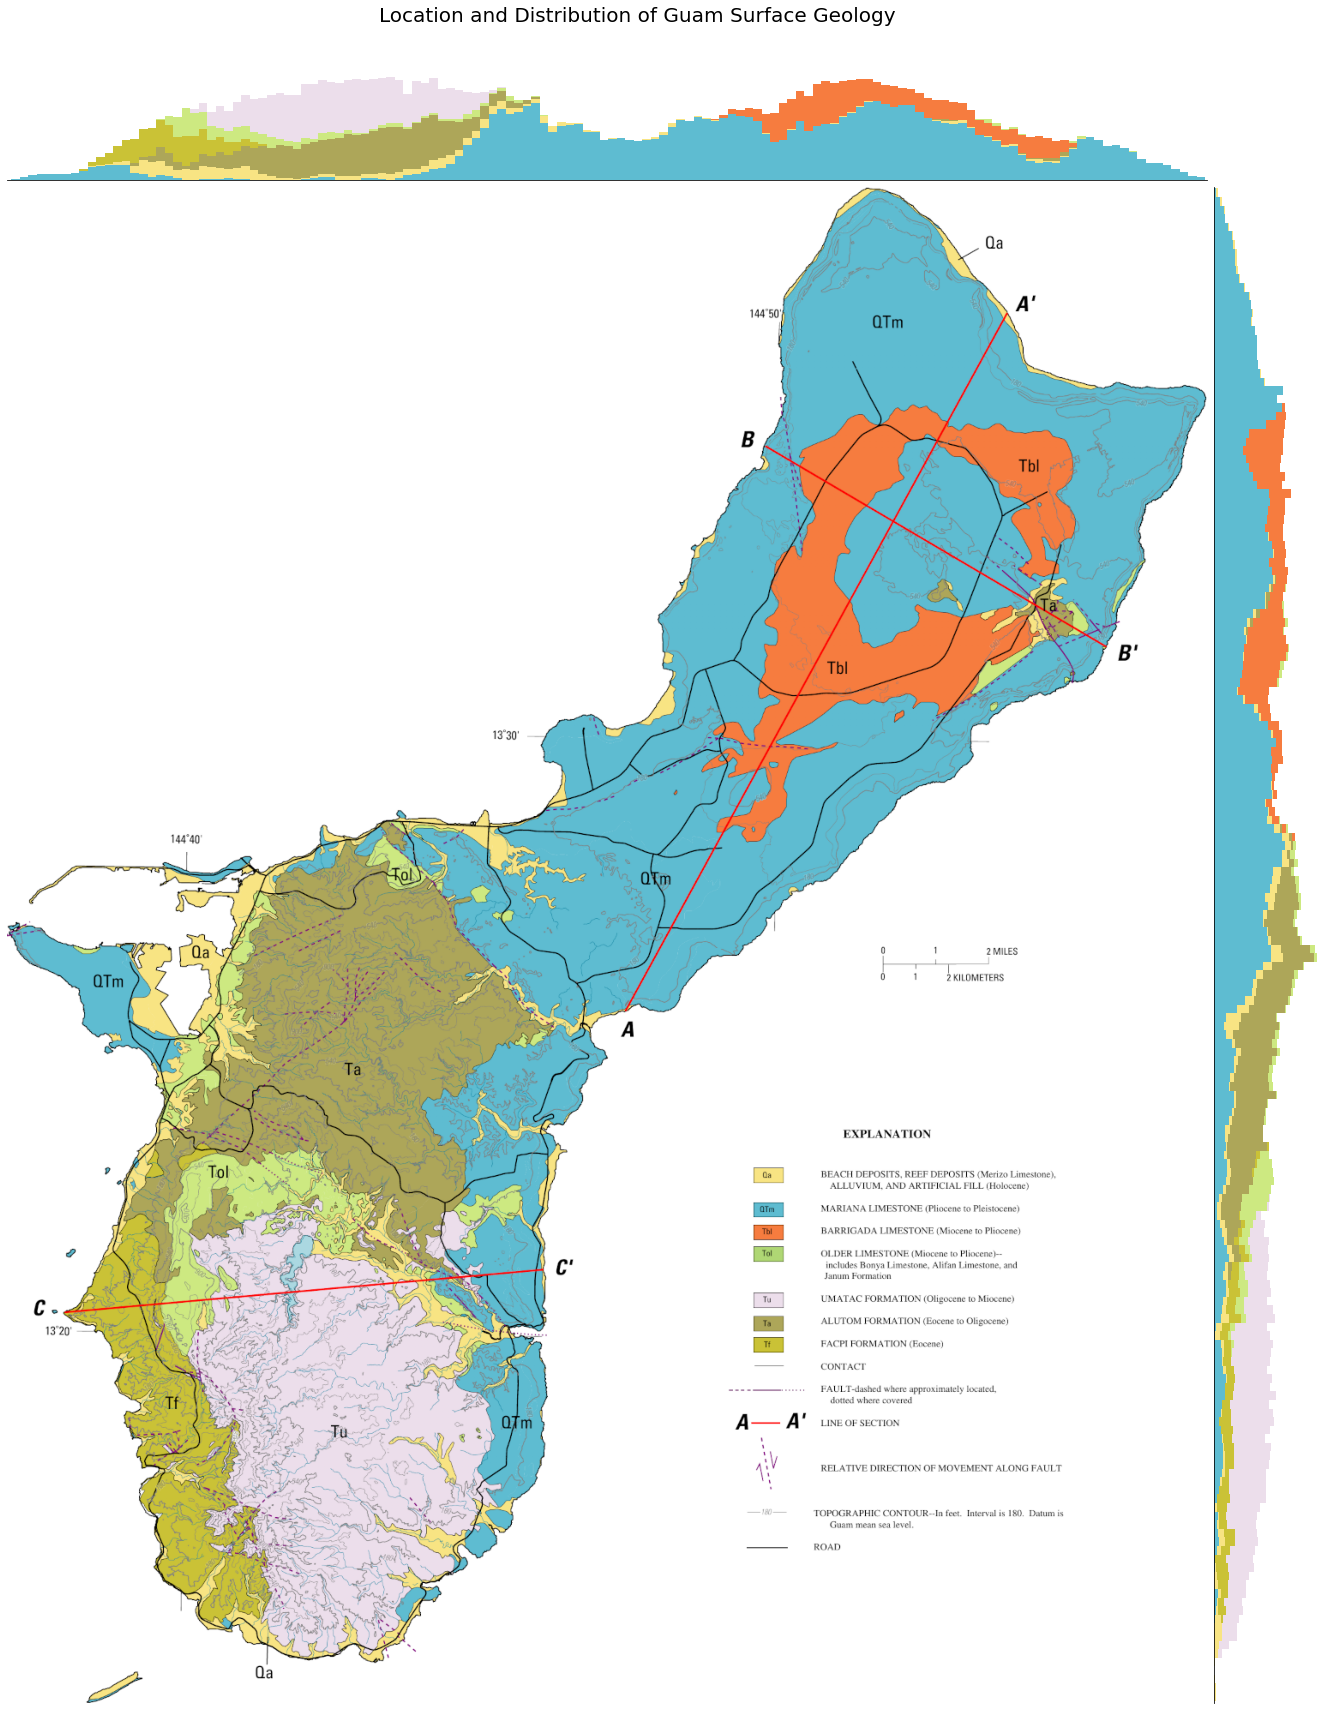

<Figure size 432x288 with 0 Axes>

In [244]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import make_axes_locatable

colors = [v["color"] for k, v in categories.items()]
labels = [k for k, v in categories.items()]
x = range(width)
y = range(height)

figsize = (30,30)
pix_per_bin = 10

filename = 'geological_map.png'
img = mpimg.imread(filename)

fig, ax = plt.subplots(figsize=figsize)

divider = make_axes_locatable(ax)
ax_histx = divider.append_axes("top", 1.5, pad=0.1, sharex=ax)
ax_histy = divider.append_axes("right", 1.5, pad=0.1, sharey=ax)

ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histy.yaxis.set_tick_params(labelleft=False)

ax.imshow(img)
ax_histx.hist(df.pivot(columns='Category', values='X')[labels],
              width // pix_per_bin,
              stacked=True,
              color=colors)

ax_histy.hist(df.pivot(columns='Category', values='Y')[labels],
              height // pix_per_bin,
              stacked=True,
              orientation='horizontal',
              color=colors)


# removing common and unwanted axis and spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax_histx.spines['right'].set_visible(False)
ax_histx.spines['top'].set_visible(False)
ax_histx.spines['left'].set_visible(False)
ax_histx.xaxis.set_visible(False)
ax_histx.yaxis.set_visible(False)
ax_histy.spines['right'].set_visible(False)
ax_histy.spines['top'].set_visible(False)
ax_histy.spines['bottom'].set_visible(False)
ax_histy.xaxis.set_visible(False)
ax_histy.yaxis.set_visible(False)

plt.suptitle("Location and Distribution of Guam Surface Geology",
             y=.91,
             fontsize=20)
plt.show()

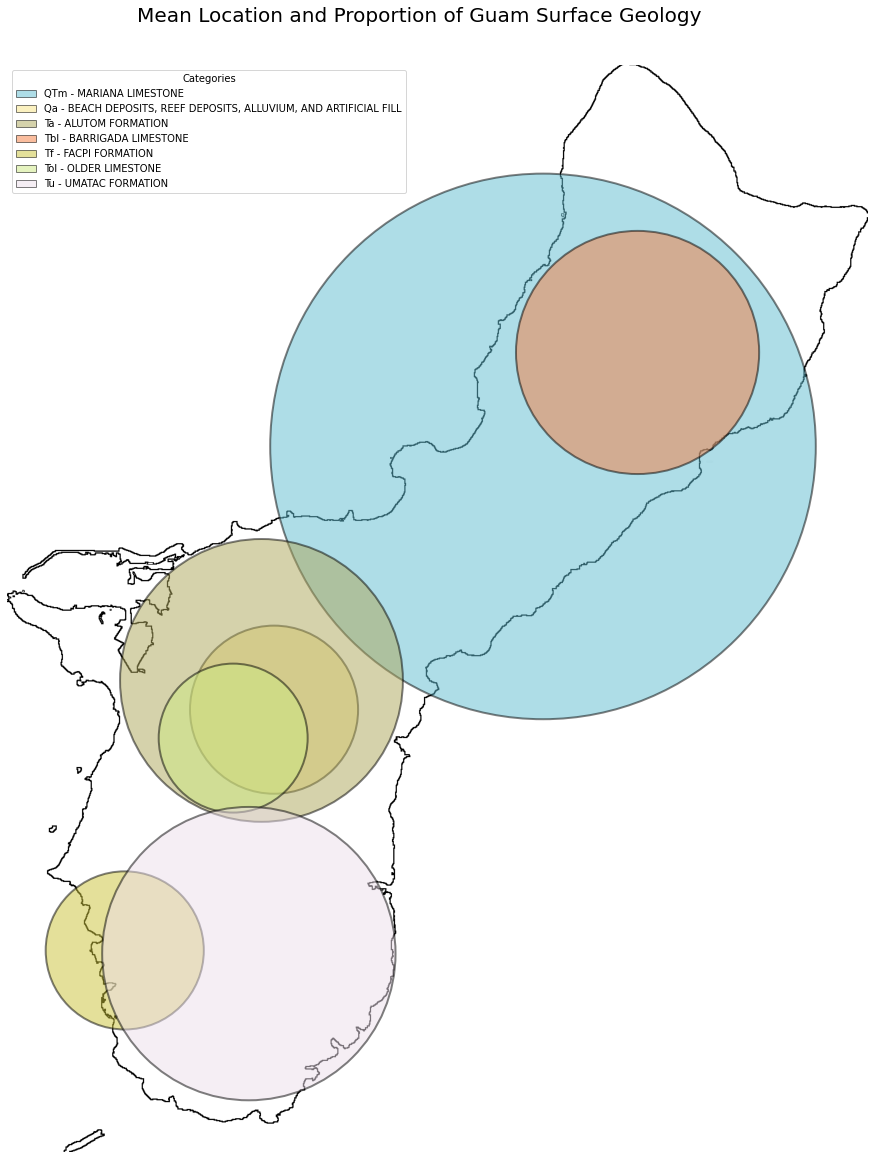

<Figure size 432x288 with 0 Axes>

In [249]:
from matplotlib import patches

x_mean = df.groupby(by='Category').mean()['X']
y_mean = df.groupby(by='Category').mean()['Y']

size_factor = 1
size = df.groupby(by='Category').count()['X'] * size_factor

figsize = (20, 20)
fig, ax = plt.subplots(figsize=figsize)

filename = 'outline.png'
img = mpimg.imread(filename)
ax.imshow(img)
scatter = plt.scatter(x_mean,
                      y_mean,
                      s=size,
                      c=colors,
                      label=labels,
                      edgecolors="#000000",
                      linewidths=2,
                      alpha=0.5)

# Some manual legend making
circles = []
for i, c in enumerate(colors):
    circles.append(patches.Circle(xy=(0, 0),
                                  radius=1,
                                  fc=c,
                                  ec="#000000",
                                  alpha=0.5))
    
# Combining label names and descriptions for legend
legend_labels = [f"{k} - {v['description']}" for k, v in categories.items()]
ax.legend(circles, legend_labels, loc="upper left", title="Categories")

# removing common and unwanted axis and spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plt.suptitle("Mean Location and Proportion of Guam Surface Geology",
             y=.92,
             fontsize=20)

plt.show()